# IMDB Review Classification with RNN and LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
# import the libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

In [4]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [5]:
# apply padding 
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [6]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

In [7]:
# define an object (initializing RNN)
model = tf.keras.models.Sequential()

In [8]:
# Embedding Layers
model.add(tf.keras.layers.Embedding(input_dim=20000, output_dim=128, input_shape=(100,)))

In [9]:
# LSTM Layer
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

In [10]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile the model 
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

train the model on the training data for 5 epochs with a batch size of 128

In [13]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 42s 257ms/step - loss: 0.5691 - accuracy: 0.6923 - val_loss: 0.6226 - val_accuracy: 0.7732
Epoch 2/5
157/157 [==============================] - 42s 268ms/step - loss: 0.3633 - accuracy: 0.8453 - val_loss: 0.3978 - val_accuracy: 0.8308
Epoch 3/5
157/157 [==============================] - 41s 261ms/step - loss: 0.2910 - accuracy: 0.8819 - val_loss: 0.3539 - val_accuracy: 0.8440
Epoch 4/5
157/157 [==============================] - 41s 264ms/step - loss: 0.2494 - accuracy: 0.9046 - val_loss: 0.3542 - val_accuracy: 0.8452
Epoch 5/5
157/157 [==============================] - 42s 266ms/step - loss: 0.2162 - accuracy: 0.9171 - val_loss: 0.3851 - val_accuracy: 0.8278


In [14]:
# generate predictions on the test data
y_pred = model.predict(x_test)

782/782 [==============================] - 21s 27ms/step


In [15]:
# convert these probabilities to binary class predictions by rounding them to the nearest integer
y_pred_binary = np.round(y_pred)

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)
print('Test loss:', loss)

782/782 [==============================] - 28s 35ms/step - loss: 0.3798 - accuracy: 0.8309
Test accuracy: 0.8309199810028076
Test loss: 0.37975215911865234


In [17]:
from sklearn.metrics import classification_report
target_names = ['Negative', 'Positive']
print(classification_report(y_test, y_pred_binary, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.84      0.81      0.83     12500
    Positive       0.82      0.85      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



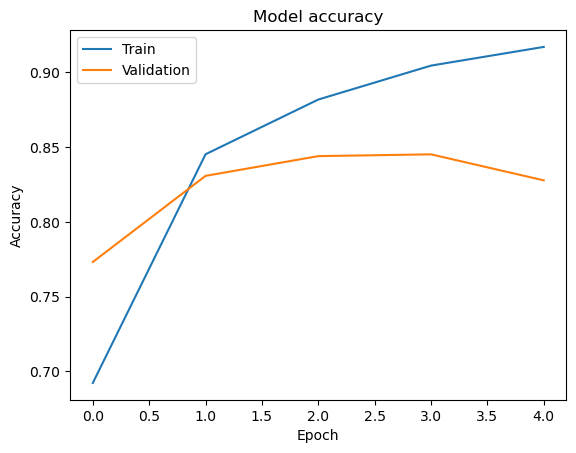

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()